In [1]:
import numpy as np
from umap import UMAP
from sklearn.datasets import make_blobs

/Users/vincent/Development/scikit-lego/venv/lib/python3.6/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [2]:
from sklego.decomposition import PCAOutlierDetection, UMAPOutlierDetection

In [3]:
from sklego.datasets import load_heroes
import matplotlib.pylab as plt

In [4]:
X = load_heroes(give_pandas=True)[['health', 'attack']].values

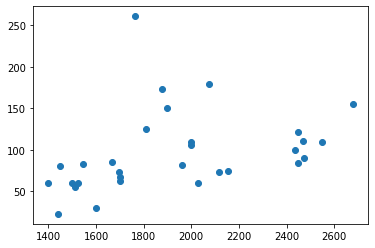

In [5]:
X = X[:30]
plt.scatter(X[:, 0], X[:, 1]);

In [6]:
mod = UMAP().fit(X)

In [7]:
from sklearn.utils import shuffle

In [35]:
n_samples = 300
X, _ = make_blobs(n_samples=n_samples, random_state=0)
X = shuffle(X, random_state=7)
X = create_memmap_backed_data(X)

In [51]:
mod = UMAPOutlierDetection(n_components=2, threshold=0.01, random_state=42).fit(X)

In [52]:
d = mod.decision_function(X)
s = mod.score_samples(X)

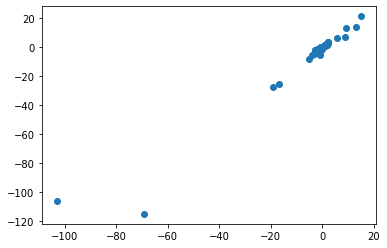

In [53]:
plt.scatter(d, s);

In [38]:
dec_pred = (d >= 0).astype(np.int)
dec_pred[dec_pred == 0] = -1
dec_pred == mod.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [39]:
def check_outliers_train(name, estimator_orig, readonly_memmap=True):
    n_samples = 300
    X, _ = make_blobs(n_samples=n_samples, random_state=0)
    X = shuffle(X, random_state=7)

    if readonly_memmap:
        X = create_memmap_backed_data(X)

    n_samples, n_features = X.shape
    estimator = clone(estimator_orig)
    set_random_state(estimator)

    # fit
    estimator.fit(X)
    # with lists
    estimator.fit(X.tolist())

    y_pred = estimator.predict(X)
    assert y_pred.shape == (n_samples,)
    assert y_pred.dtype.kind == 'i'
    assert_array_equal(np.unique(y_pred), np.array([-1, 1]))

    decision = estimator.decision_function(X)
    scores = estimator.score_samples(X)
    for output in [decision, scores]:
        assert output.dtype == np.dtype('float')
        assert output.shape == (n_samples,)

    # raises error on malformed input for predict
    assert_raises(ValueError, estimator.predict, X.T)
    # decision_function agrees with predict
    dec_pred = (decision >= 0).astype(np.int)
    dec_pred[dec_pred == 0] = -1
    assert_array_equal(dec_pred, y_pred)

    # raises error on malformed input for decision_function
    assert_raises(ValueError, estimator.decision_function, X.T)

    # decision_function is a translation of score_samples
    y_dec = scores - estimator.offset_
    assert_allclose(y_dec, decision)

    # raises error on malformed input for score_samples
    assert_raises(ValueError, estimator.score_samples, X.T)

    # contamination parameter (not for OneClassSVM which has the nu parameter)
    if (hasattr(estimator, 'contamination')
            and not hasattr(estimator, 'novelty')):
        # proportion of outliers equal to contamination parameter when not
        # set to 'auto'. This is true for the training set and cannot thus be
        # checked as follows for estimators with a novelty parameter such as
        # LocalOutlierFactor (tested in check_outliers_fit_predict)
        expected_outliers = 30
        contamination = expected_outliers / n_samples
        estimator.set_params(contamination=contamination)
        estimator.fit(X)
        y_pred = estimator.predict(X)

        num_outliers = np.sum(y_pred != 1)
        # num_outliers should be equal to expected_outliers unless
        # there are ties in the decision_function values. this can
        # only be tested for estimators with a decision_function
        # method, i.e. all estimators except LOF which is already
        # excluded from this if branch.
        if num_outliers != expected_outliers:
            decision = estimator.decision_function(X)
            check_outlier_corruption(num_outliers, expected_outliers, decision)

        # raises error when contamination is a scalar and not in [0,1]
        for contamination in [-0.5, 2.3]:
            estimator.set_params(contamination=contamination)
            assert_raises(ValueError, estimator.fit, X)

In [54]:
from sklearn.base import clone 
from sklearn.utils.testing import set_random_state, assert_array_equal, assert_raises, create_memmap_backed_data

check_outliers_train('umap', UMAPOutlierDetection(n_components=2, threshold=0.1, variant='absolute'), False)

[-0.04933301 -0.97430072  0.01670717 -0.91673621 -1.11791664 -1.70266679
 -0.36537922 -0.46948099 -0.95488954 -2.90885917 -0.18917199 -0.57484254
 -0.49201954 -0.65378682 -0.9296337  -1.71413471 -0.44387766 -1.61473923
 -1.07551132 -1.68697785 -0.16216747 -0.83524618 -1.55779608 -1.6535795
 -0.21558973 -0.964576   -0.9780625  -1.74281482 -1.49431383 -1.52790619
 -1.8965112  -0.77717905 -1.7709041  -0.32377237 -0.32311938 -0.26361722
 -1.77408594 -0.94761617 -0.67290537 -0.84156394 -1.13610061 -0.8311014
 -1.22773195 -1.41046672 -1.19090663 -0.37696298 -0.94424751 -2.68796486
 -1.09516732 -3.06136706 -0.77406075 -0.27346234 -2.17263101 -0.77720508
 -1.30903345 -1.38346989 -2.34883508 -0.80519705 -1.35970239 -0.10556305
 -0.78489564 -0.6318852  -0.3727315  -0.70657406 -1.48997734 -2.27763895
 -0.62059444 -3.63759644 -0.78673579 -0.91389987 -0.23620622 -0.45951545
 -2.65805389 -1.11239727 -0.7757159  -0.80449962 -1.01135059 -1.40388214
 -1.21948875 -1.47117077 -0.51681533 -0.23231159 -0.4

AssertionError: 
Arrays are not equal

Mismatched elements: 4 / 300 (1.33%)
Max absolute difference: 2
Max relative difference: 2.
 x: array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,...
 y: array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,...